In [103]:
import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [58]:
df = pd.read_csv('911.csv')

In [59]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [60]:
df.info

<bound method DataFrame.info of              lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
5      40.253473 -75.283245   
6      40.182111 -75.127795   
7      40.217286 -75.405182   
8      40.289027 -75.399590   
9      40.102398 -75.291458   
10     40.231990 -75.251891   
11     40.084161 -75.308386   
12     40.174131 -75.098491   
13     40.062974 -75.135914   
14     40.097222 -75.376195   
15     40.223778 -75.235399   
16     40.243258 -75.286552   
17     40.312181 -75.574260   
18     40.114239 -75.338508   
19     40.209337 -75.135266   
20     40.114239 -75.338508   
21     40.117948 -75.209848   
22     40.199006 -75.300058   
23     40.143326 -75.422819   
24     40.153268 -75.189558   
25     40.133037 -75.408463   
26     40.155283 -75.264230   
27     40.028903 -75.351822   
28     40.097222 -75.376195   
29     40.209337 -75.135266   
...    

In [61]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [62]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [63]:
df['title'].nunique()

110

In [64]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [65]:
df['Reason'].value_counts().head(5)

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

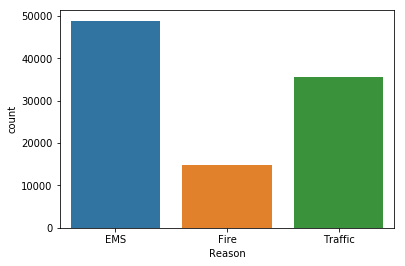

In [66]:
sns.countplot(x='Reason', data=df)

In [67]:
type(df['timeStamp'].iloc[1])

str

In [68]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [69]:
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour )
df['Month'] = df['timeStamp'].apply(lambda time : time.month )
df['Day of Week'] = df['timeStamp'].apply(lambda time : time.dayofweek)
df['Day of Week'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Day of Week, dtype: int64

In [70]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


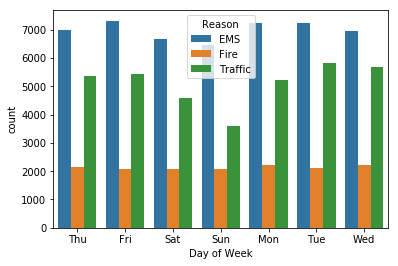

In [71]:
sns.countplot(x='Day of Week', hue='Reason',data=df)

In [72]:
df['Month'].value_counts()

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: Month, dtype: int64

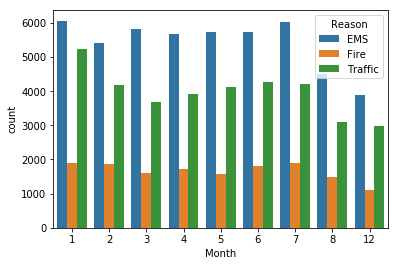

In [73]:
sns.countplot(x='Month', hue='Reason',data=df)

In [74]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


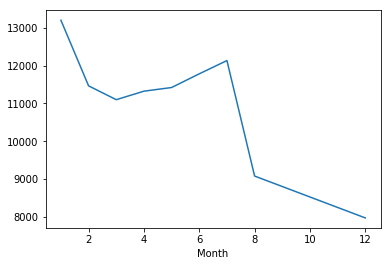

In [75]:
byMonth['desc'].plot()

In [76]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [77]:
byDate = df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


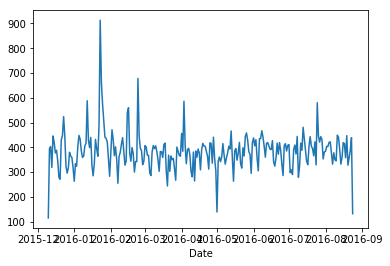

In [78]:
byDate['twp'].plot()

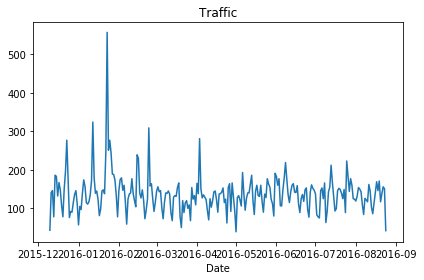

In [79]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

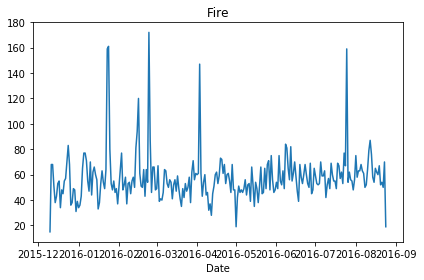

In [80]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

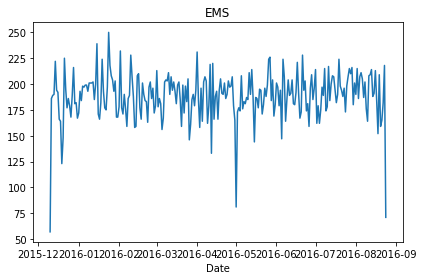

In [81]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [92]:
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


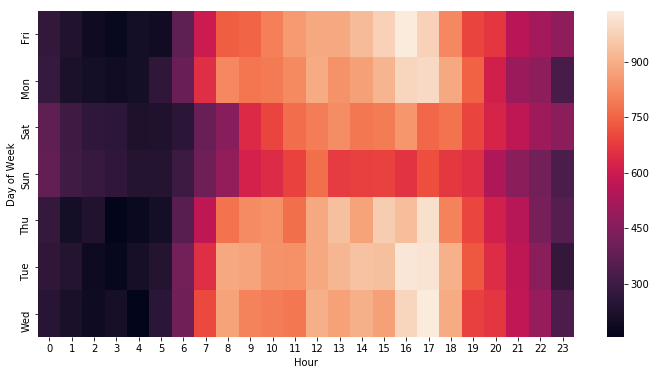

In [95]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

<Figure size 864x432 with 0 Axes>

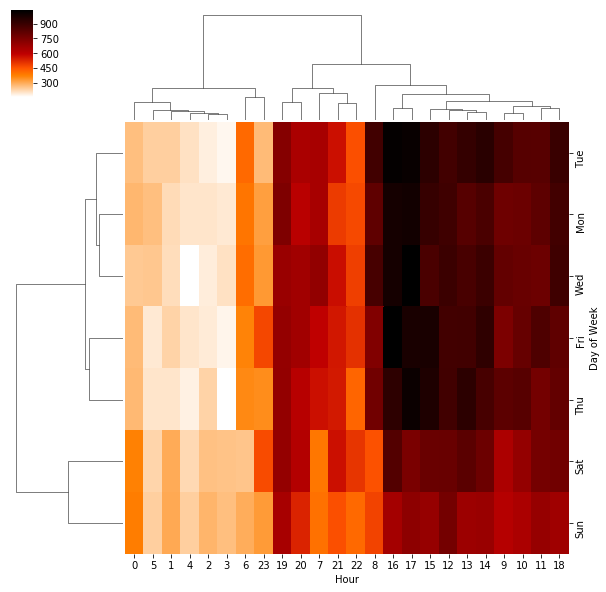

In [102]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour, cmap='gist_heat_r')
